In [1]:
# 从sklearn 调入所需要的包
# from sklearn import datasets
from sklearn.model_selection import train_test_split #数据分隔出训练集和验证集
import lightgbm as lgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#导入精度和召回
from sklearn.metrics import precision_score, recall_score


In [2]:
path='C:/Users/Yan3/Desktop/dataset/BI_attrition/'
train = pd.read_csv(path+'input/train.csv')
test = pd.read_csv(path+'input/test.csv')
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   user_id                   1176 non-null   int64 
 1   Age                       1176 non-null   int64 
 2   Attrition                 1176 non-null   object
 3   BusinessTravel            1176 non-null   object
 4   DailyRate                 1176 non-null   int64 
 5   Department                1176 non-null   object
 6   DistanceFromHome          1176 non-null   int64 
 7   Education                 1176 non-null   int64 
 8   EducationField            1176 non-null   object
 9   EmployeeCount             1176 non-null   int64 
 10  EmployeeNumber            1176 non-null   int64 
 11  EnvironmentSatisfaction   1176 non-null   int64 
 12  Gender                    1176 non-null   object
 13  HourlyRate                1176 non-null   int64 
 14  JobInvolvement          

In [3]:
train.describe()

,user_id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.000000
mean,736.124150,36.805272,802.033163,9.159864,2.918367,1.0,1026.960034,2.750850,65.130102,2.724490,...,2.714286,80.0,0.805272,11.161565,2.767007,2.764456,6.982143,4.19898,2.160714,4.098639
std,419.336964,9.065549,405.946729,8.137224,1.009809,0.0,594.763609,1.096221,20.294326,0.715027,...,1.080583,0.0,0.865611,7.747576,1.250756,0.713251,6.094338,3.63124,3.208052,3.564190
min,0.000000,18.000000,104.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,374.750000,30.000000,463.500000,2.000000,2.000000,1.0,498.750000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,742.500000,36.000000,805.500000,7.000000,3.000000,1.0,1031.000000,3.000000,65.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,1101.250000,42.250000,1162.000000,14.000000,4.000000,1.0,1555.250000,4.000000,82.250000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.00000,2.250000,7.000000
max,1469.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


In [4]:
test.describe()

,user_id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.0,294.000000,294.000000,294.000000,294.000000,...,294.000000,294.0,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,728.003401,37.397959,804.295918,9.323129,2.891156,1.0,1016.486395,2.605442,68.935374,2.751701,...,2.704082,80.0,0.748299,11.751701,2.928571,2.748299,7.112245,4.350340,2.295918,4.221088
std,445.219266,9.410335,394.282089,7.996651,1.081203,0.0,631.212630,1.074418,20.218581,0.698302,...,1.085516,0.0,0.795410,7.907933,1.428023,0.679726,6.263088,3.594134,3.282623,3.588296
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,327.000000,31.000000,492.750000,2.000000,2.000000,1.0,445.000000,2.000000,52.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,692.500000,36.000000,773.500000,7.000000,3.000000,1.0,966.500000,3.000000,70.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.250000,43.000000,1129.250000,14.000000,4.000000,1.0,1556.250000,3.000000,87.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.750000,7.000000,3.000000,7.000000
max,1462.000000,60.000000,1496.000000,29.000000,5.000000,1.0,2056.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,37.000000,6.000000,4.000000,36.000000,17.000000,15.000000,17.000000


### Check missing data

In [5]:
train.isnull().any()

user_id                     False
Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYe

In [6]:
train.corr()

,user_id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
user_id,1.000000,0.009300,-0.041355,0.029618,0.058138,NaN,0.999906,0.042355,0.014785,-0.012119,...,-0.064190,NaN,0.041794,-0.008958,-0.018542,0.006358,-0.019605,-0.019685,-0.016308,-0.025553
Age,0.009300,1.000000,0.016997,-0.006119,0.201116,NaN,0.009602,0.016010,0.035942,0.043840,...,0.059735,NaN,0.045595,0.686609,-0.014888,-0.018682,0.317604,0.220128,0.213677,0.204173
DailyRate,-0.041355,0.016997,1.000000,-0.013230,-0.013333,NaN,-0.040680,0.013415,0.024577,0.045446,...,0.000101,NaN,0.045414,0.022416,0.000097,-0.017483,-0.021911,0.027265,-0.015516,-0.002437
DistanceFromHome,0.029618,-0.006119,-0.013230,1.000000,-0.005039,NaN,0.029432,-0.013182,0.024524,0.020156,...,0.028912,NaN,0.056862,-0.005337,-0.051527,-0.010663,-0.003907,0.015311,-0.005778,0.014304
Education,0.058138,0.201116,-0.013333,-0.005039,1.000000,NaN,0.058453,-0.038378,0.004381,0.052512,...,0.000446,NaN,0.016850,0.148434,-0.016419,0.026454,0.070153,0.063850,0.043986,0.063246
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,0.999906,0.009602,-0.040680,0.029432,0.058453,NaN,1.000000,0.042183,0.015261,-0.011711,...,-0.064441,NaN,0.041471,-0.009325,-0.018590,0.005984,-0.019196,-0.019196,-0.016330,-0.025114
EnvironmentSatisfaction,0.042355,0.016010,0.013415,-0.013182,-0.038378,NaN,0.042183,1.000000,-0.048388,0.000299,...,0.018885,NaN,-0.002740,-0.004375,-0.014442,0.038081,-0.003979,0.028714,0.016720,-0.008952
HourlyRate,0.014785,0.035942,0.024577,0.024524,0.004381,NaN,0.015261,-0.048388,1.000000,0.070095,...,0.008333,NaN,0.039087,0.000532,-0.023348,-0.012992,-0.011851,-0.011254,-0.001080,-0.021674
JobInvolvement,-0.012119,0.043840,0.045446,0.020156,0.052512,NaN,-0.011711,0.000299,0.070095,1.000000,...,0.036821,NaN,0.001249,0.023866,-0.037580,-0.022222,0.004729,0.018510,-0.013330,0.036053


### Take look at the distribution of data

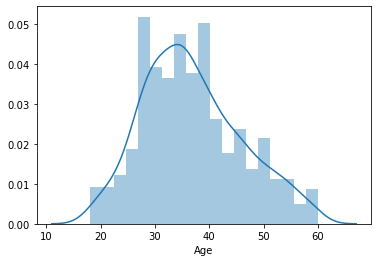

In [7]:
sns.distplot(train['Age'])

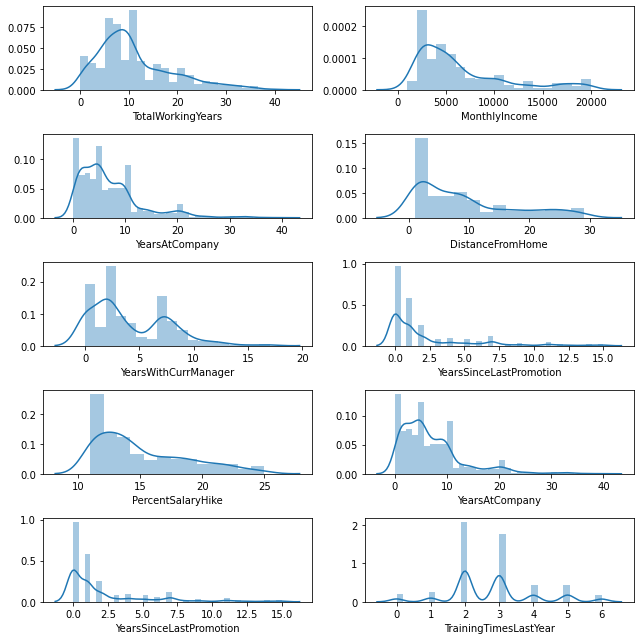

In [8]:
fig, ax = plt.subplots(5,2, figsize=(9,9))
sns.distplot(train['TotalWorkingYears'], ax = ax[0,0])
sns.distplot(train['MonthlyIncome'], ax = ax[0,1])
sns.distplot(train['YearsAtCompany'], ax = ax[1,0])
sns.distplot(train['DistanceFromHome'], ax = ax[1,1])
sns.distplot(train['YearsWithCurrManager'], ax = ax[2,0])
sns.distplot(train['YearsSinceLastPromotion'], ax = ax[2,1])
sns.distplot(train['PercentSalaryHike'], ax = ax[3,0])
sns.distplot(train['YearsAtCompany'], ax = ax[3,1])
sns.distplot(train['YearsSinceLastPromotion'], ax = ax[4,0])
sns.distplot(train['TrainingTimesLastYear'], ax = ax[4,1])
plt.tight_layout()
plt.show()

### Correlation of features

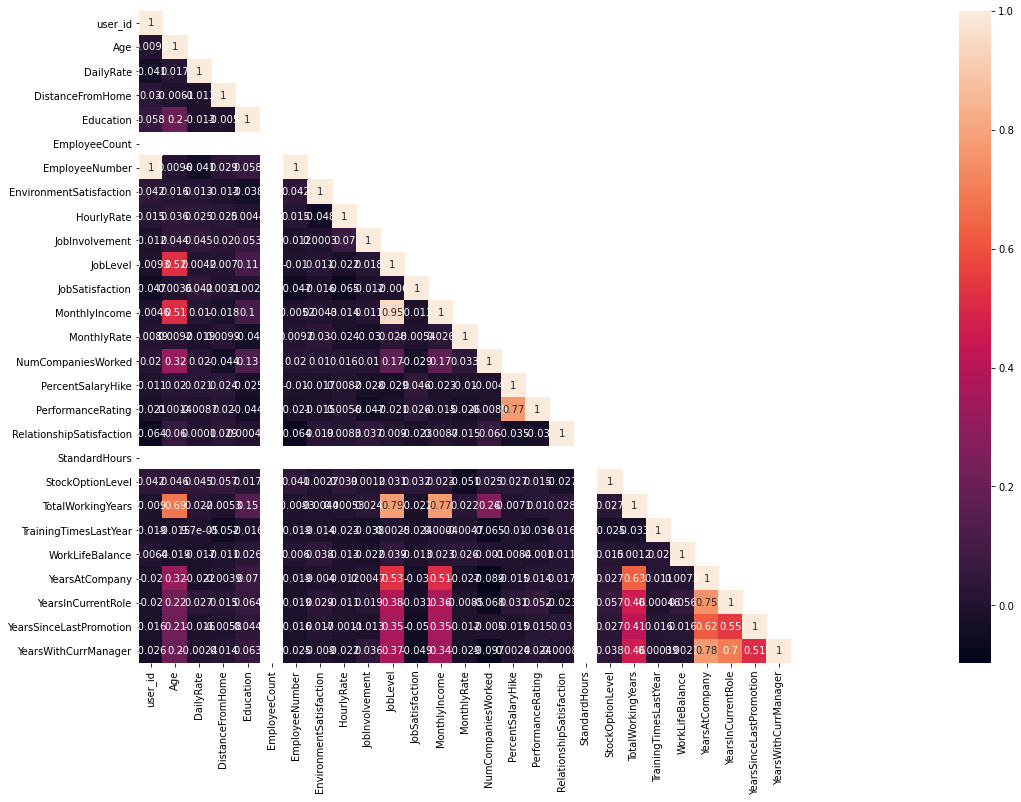

In [9]:
cor_mat = train.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(60,12)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True)

In [10]:
train.Attrition.value_counts()

No     988
Yes    188
Name: Attrition, dtype: int64

In [11]:
### dummy label
train.loc[train.Attrition=="Yes",'Attrition']=1
train.loc[train.Attrition=="No",'Attrition']=0

In [12]:
train.Attrition.unique()

array([0, 1], dtype=object)

In [13]:
test['Attrition']=-1
print(len(test.columns))

36


In [14]:
data = train.append(test).reset_index(drop=True)
# data = pd.concat([train,test]).reset_index(drop=True)
print(data.head())

   user_id  Age Attrition     BusinessTravel  DailyRate  \
0     1374   58         0      Travel_Rarely        605   
1     1092   45         0      Travel_Rarely        950   
2      768   40         0      Travel_Rarely        300   
3      569   36         0         Non-Travel       1434   
4      911   25         1  Travel_Frequently        599   

               Department  DistanceFromHome  Education    EducationField  \
0                   Sales                21          3     Life Sciences   
1  Research & Development                28          3  Technical Degree   
2                   Sales                26          3         Marketing   
3                   Sales                 8          4     Life Sciences   
4                   Sales                24          1     Life Sciences   

   EmployeeCount  ...  RelationshipSatisfaction  StandardHours  \
0              1  ...                         3             80   
1              1  ...                         4         

In [15]:

import os
import json
import gc
# os.system('pip install numba')
from numba import jit
#tqdm
# os.system('pip install tqdm')
from tqdm import tqdm_notebook
from tqdm import tqdm

#Integrated model
# os.system('pip install lightgbm')
import lightgbm as lgb
# os.system('pip install catboost==0.15.2')
import catboost as cbt
# os.system('pip install xgboost')
# import xgboost as xgb

#base import 
import numpy as np
import pandas as pd

# about sklearn
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler as std
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import f1_score
#about time
import time
import datetime 
from datetime import datetime, timedelta

#Garbage collection
import gc
# scipy
from scipy.signal import hilbert
from scipy.signal import hann
from scipy.signal import convolve
from scipy import stats
import scipy.spatial.distance as dist
#other
from collections import Counter 
from statistics import mode 
    #warning
import warnings
warnings.filterwarnings("ignore")
import json 
import math
from itertools import product
import ast 

In [16]:
data.Attrition.unique()

array([0, 1, -1], dtype=object)

In [17]:
cat_col = [i for i in data.select_dtypes(object).columns if i not in ['user_id','Attrition']]
for i in tqdm_notebook(cat_col):
    lbl = LabelEncoder()
#     data['count_' + i] = data.groupby([i])[i].transform('count')
    data[i] = lbl.fit_transform(data[i].astype(str))
    
for i in cat_col:
    data[i] = data[i].astype('category')

In [18]:
data.head()

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,0,2,605,2,21,3,1,1,...,3,80,1,29,2,2,1,0,0,0
1,1092,45,0,2,950,1,28,3,5,1,...,4,80,1,8,3,3,5,4,0,3
2,768,40,0,2,300,2,26,3,2,1,...,2,80,1,8,3,2,7,7,7,5
3,569,36,0,0,1434,2,8,4,1,1,...,2,80,0,10,1,3,10,7,0,9
4,911,25,1,1,599,2,24,1,1,1,...,4,80,0,1,4,3,1,0,1,0


In [19]:
data.columns

Index(['user_id', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [20]:
order=['user_id', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']
data=data[order]
data.head()

,user_id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1374,58,2,605,2,21,3,1,1,1938,...,80,1,29,2,2,1,0,0,0,0
1,1092,45,2,950,1,28,3,5,1,1546,...,80,1,8,3,3,5,4,0,3,0
2,768,40,2,300,2,26,3,2,1,1066,...,80,1,8,3,2,7,7,7,5,0
3,569,36,0,1434,2,8,4,1,1,789,...,80,0,10,1,3,10,7,0,9,0
4,911,25,1,599,2,24,1,1,1,1273,...,80,0,1,4,3,1,0,1,0,1


In [21]:
feats = [i for i in data.columns if i not in ['user_id','Attrition']]
feats

['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [22]:
print(len(feats))

34


In [23]:
data1 =data[data['Attrition']!=-1][feats]
label1 =data[data['Attrition']!=-1]['Attrition']
testx= data[data['Attrition']==-1][feats]

train_x, test_x, train_y= data1,testx,label1

In [24]:



# 采用Z-Score规范化
from sklearn import preprocessing
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_ss_x,train_y.astype('str'))
test_pre = logreg.predict_proba(test_ss_x)[:,1]#, num_iteration=model.best_iteration


In [25]:
logreg.predict(test_ss_x)

array(['0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

In [26]:
print(len(test_pre))

294


In [27]:
pre=data[data['Attrition']==-1][['user_id']]
pre['Attrition']=test_pre
print(len(pre))

294


In [28]:
pre.head()

,user_id,Attrition
1176,442,0.180726
1177,1091,0.205832
1178,981,0.345980
1179,785,0.117406
1180,1332,0.687108


In [29]:
pre.to_csv('C:/Users/Yan3/Desktop/dataset/BI_attrition/output/submission_2.csv', index=False)